In [1]:
import random
import numpy as np
from autograd import grad, jacobian
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
def get_sample():
  np.random.seed(seed=60) # fixed state of randgenerator
  alpha, beta = random.randrange(0, 1), random.randrange(0, 1)
  n = 100
  x = []
  y = []
  mu, sigma = 0, 1 # mean and standard deviation
  np.random.normal(mu, sigma)
  for k in range(n):
    x.append(k / n)
    y.append(alpha * x[k] + beta + np.random.normal(mu, sigma))
  return x, y

def D1(x = []):  
    a = x[0]
    b = x[1]
    x = get_sample()[0]
    y = get_sample()[1]
    D_linear = 0
    for k in range(100):
      D_linear += ((a * x[k] + b) - y[k]) ** 2
    return D_linear

def derivative_D1_a(a, b):
    derivative_D1_a = 0
    x = get_sample()[0]
    y = get_sample()[1]
    for k in range(100):
      derivative_D1_a += 2 * x[k] * (a * x[k] + b - y[k])
    return derivative_D1_a

def derivative_D1_b(a, b):
    derivative_D1_b = 0
    x = get_sample()[0]
    y = get_sample()[1]
    for k in range(100):
      derivative_D1_b += 2 * a * x[k] + 2 * b - 2 * y[k]
    return derivative_D1_b

def D2(x = []):  
    a = x[0]
    b = x[1]
    x = get_sample()[0]
    y = get_sample()[1]
    D_rational = 0
    for k in range(100):
      D_rational += (a / (1 + b * x[k]) - y[k]) ** 2
    return D_rational

def derivative_D2_a(a, b):
    derivative_D2_a = 0
    x = get_sample()[0]
    y = get_sample()[1]
    for k in range(100):
      derivative_D2_a += 2 * x[k] * (a * x[k] + b - y[k])
    return derivative_D2_a

def derivative_D2_b(a, b):
    derivative_D2_b = 0
    x = get_sample()[0]
    y = get_sample()[1]
    for k in range(100):
      derivative_D2_b += 2 * a * x[k] + 2 * b - 2 * y[k]
    return derivative_D2_b

def linear_approximation(a, b):
  x = []
  y = []
  for k in range(100):
    x.append(k / 100)
    y.append(a * x[k] + b)
  return x, y

def rational_approximation(a, b):
  x = []
  y = []
  for k in range(100):
    x.append(k / 100)
    y.append(a / (1 + b * x[k]))
  return x, y

def get_plot(title_plot, x, y, x1 = [], y1 = [], x2 = [], y2 = [], x3 = [], y3 = [], x4 = [], y4 = []):
  plt.figure(figsize=(15,7)) #determed size of graph
  plt.title(title_plot)   #give title to the graph
  plt.xlabel('x') #label of x axes
  plt.ylabel('y') #label of y axes
  plt.legend(labels=['Noise data', 'Approximity function'])
  plt.scatter(x, y, marker="+", label = "Noise data", color='red') #drew noise data 
  plt.plot(x1, y1, linewidth = 1, label = "Gradient discent", color='blue') #drew approx function
  plt.plot(x2, y2, linewidth = 1, label = "Conjugate gradient", color='green') #drew approx function
  plt.plot(x3, y3, linewidth = 1, label = "Newton-CG", color='magenta') #drew approx function
  plt.plot(x4, y4, linewidth = 1, label = "Levenberg-Marquardt", color='orange') #drew approx function  
  plt.legend(loc='upper left') #show legend
  plt.show() # show plot

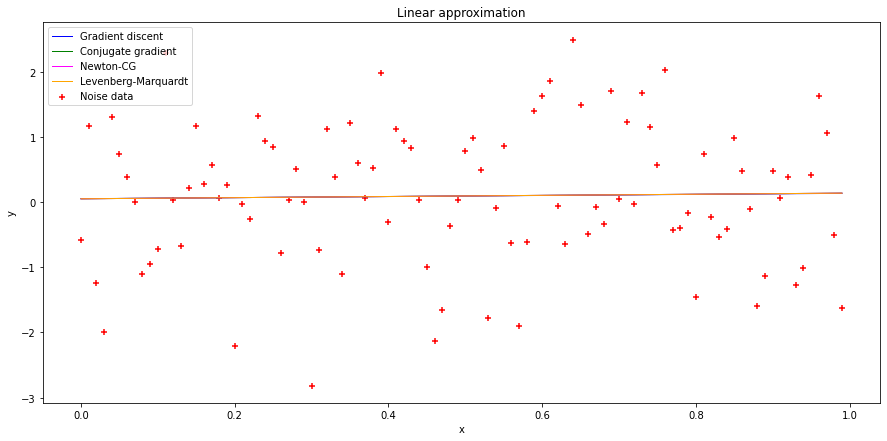

In [ ]:
get_plot("Linear approximation", 
         get_sample()[0], get_sample()[1],
         x1 = linear_approximation(0.08299286027924956, 0.05100389052966736)[0], 
         y1 = linear_approximation(0.08299286027924956, 0.05100389052966736)[1],
         x2 = linear_approximation(0.08679286, 0.05005707)[0], 
         y2 = linear_approximation(0.08679286, 0.05005707)[1],
         x3 = linear_approximation(0.08679262, 0.0500572)[0], 
         y3 = linear_approximation(0.08679262, 0.0500572)[1],
         x4 = linear_approximation(0.08679261, 0.0500572)[0], 
         y4 = linear_approximation(0.08679261, 0.0500572)[1]
         )

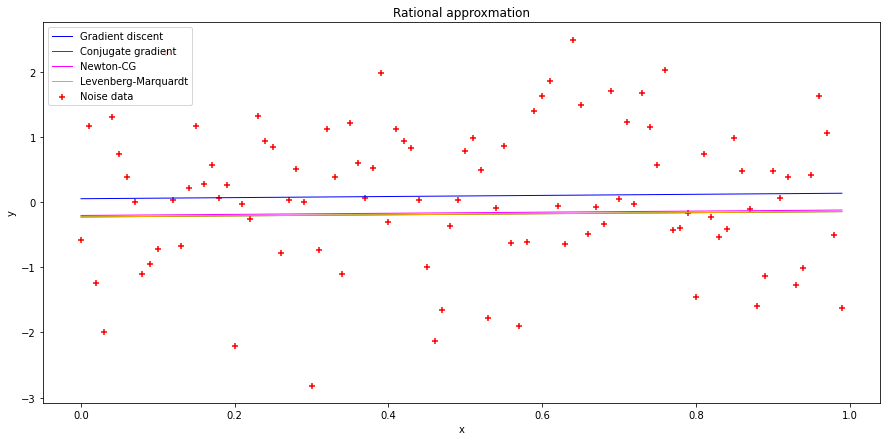

In [ ]:
get_plot("Rational approxmation", 
         get_sample()[0], get_sample()[1],
         x1 = linear_approximation(0.08476320045521418, 0.05079374756702702)[0], 
         y1 = linear_approximation(0.08476320045521418, 0.05079374756702702)[1],
         x2 = linear_approximation(0.08262189, -0.22893109)[0], 
         y2 = linear_approximation(0.08262189, -0.22893109)[1],
         x3 = linear_approximation(0.08383282, -0.20574289)[0], 
         y3 = linear_approximation(0.08383282, -0.20574289)[1],
         x4 = linear_approximation(0.08266527, -0.22815731)[0], 
         y4 = linear_approximation(0.08266527, -0.22815731)[1]
          )

# Gradient discent

In [ ]:
def gradient_discent(test_function, eps, max_iters, x = []):
  a = x[0]
  b = x[1]
  a_prev = x[0] - 1
  b_prev = x[1] - 1
  rate = 0.01 # Learning rate
  iteration = 0 
  if test_function == D1:
    while abs(D1([a,b]) - D1([a_prev, b_prev])) > eps and iteration < max_iters:
      a_prev, b_prev = a, b #Store current x value in prev_x
      a = a - rate * derivative_D1_a(a, b)
      b = b - rate * derivative_D1_b(a, b)
      iteration += 1
    print("The local minimum occurs at [{0}, {1}]".format(a, b), iteration, D1([a,b]), sep = "\n")
  if test_function == D2:
    while abs(D2([a,b]) - D2([a_prev, b_prev])) > eps and iteration < max_iters:
      a_prev, b_prev = a, b #Store current x value in prev_x
      a = a - rate * derivative_D1_a(a, b)
      b = b - rate * derivative_D1_b(a, b)
      iteration += 1
    print("The local minimum occurs at [{0}, {1}]".format(a, b), iteration, D2([a,b]), sep = "\n")

print(gradient_discent(D1, 0.001, 10000, [0, 0]))
print(gradient_discent(D2, 0.001, 10000, [0, 0]))

The local minimum occurs at [0.08299286027924956, 0.05100389052966736]
6
115.17286139526146
None
The local minimum occurs at [0.08476320045521418, 0.05079374756702702]
8
115.2525143705219
None


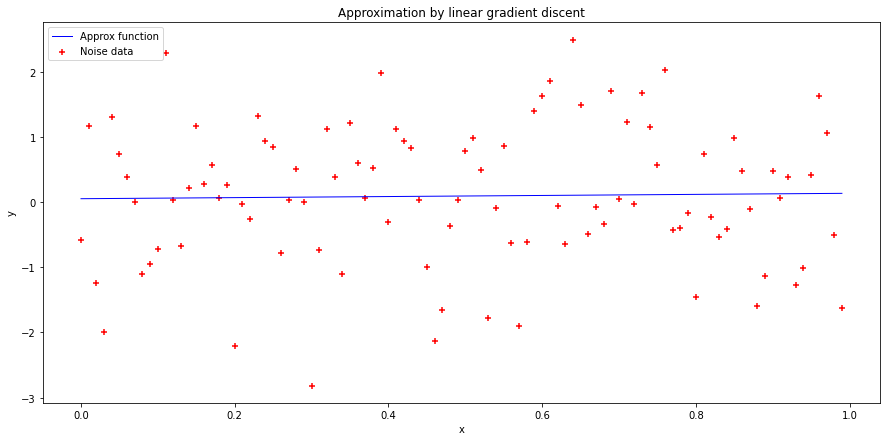

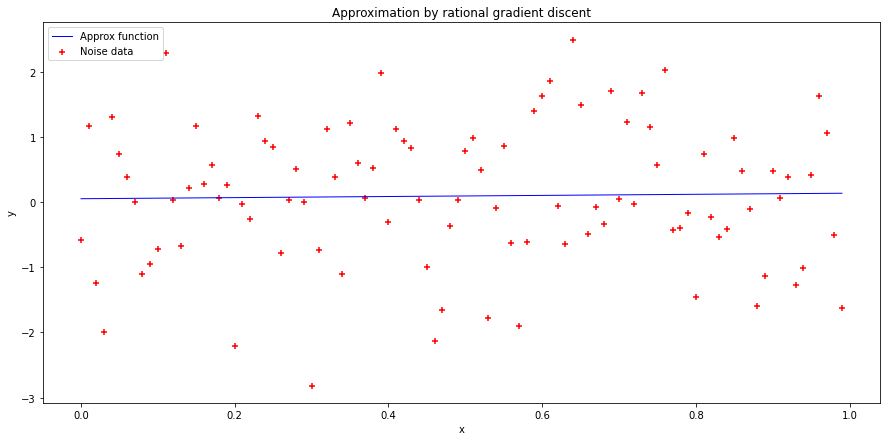

In [ ]:
get_plot("Approximation by linear gradient discent", 
         get_sample()[0], get_sample()[1], 
         linear_approximation(0.08299286027924956, 0.05100389052966736)[0], 
         linear_approximation(0.08299286027924956, 0.05100389052966736)[1])
get_plot("Approximation by rational gradient discent", 
         get_sample()[0], get_sample()[1], 
         linear_approximation(0.08476320045521418, 0.05079374756702702)[0], 
         linear_approximation(0.08476320045521418, 0.05079374756702702)[1])

# Conjugate gradient

In [ ]:
print(scipy.optimize.minimize(D1, [0, 0], method="CG", tol = 0.001), "\n")
print(scipy.optimize.minimize(D2, [0, 0], method="CG", tol = 0.001))

     fun: 115.17265381884314
     jac: array([ 9.53674316e-07, -9.53674316e-07])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([0.08679286, 0.05005707]) 

     fun: 115.21764971886448
     jac: array([-0.00057411, -0.00068283])
 message: 'Optimization terminated successfully.'
    nfev: 44
     nit: 6
    njev: 11
  status: 0
 success: True
       x: array([ 0.08262189, -0.22893109])


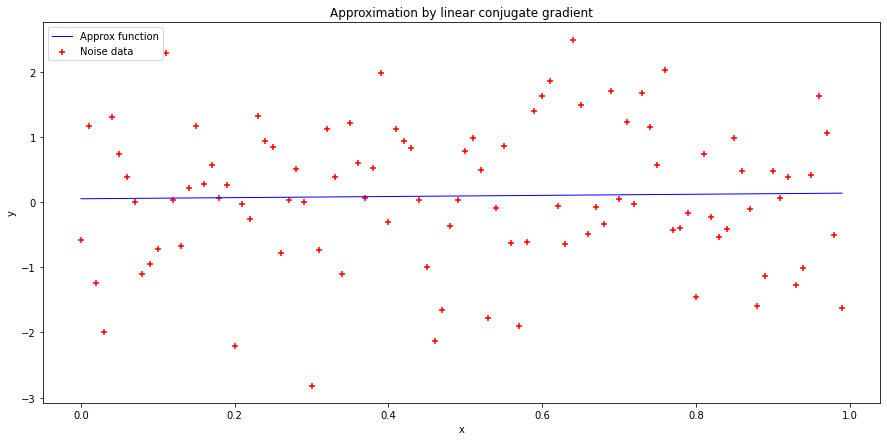

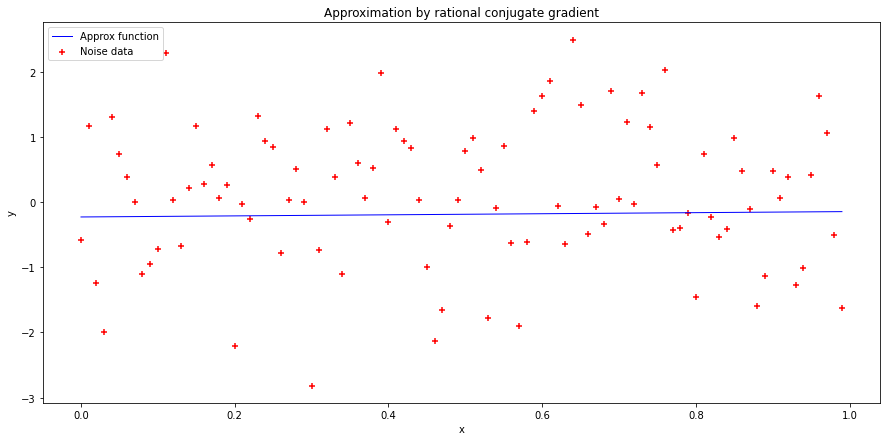

In [ ]:
get_plot("Approximation by linear conjugate gradient", 
         get_sample()[0], get_sample()[1], 
         linear_approximation(0.08679286, 0.05005707)[0], 
         linear_approximation(0.08679286, 0.05005707)[1])

get_plot("Approximation by rational conjugate gradient", 
         get_sample()[0], get_sample()[1], 
         linear_approximation(0.08262189, -0.22893109)[0], 
         linear_approximation(0.08262189, -0.22893109)[1])

# Newton-CG

In [ ]:
print(scipy.optimize.minimize(D1, [0, 0], method="Newton-CG", jac = jacobian(D1), tol=0.001), "\n")
print(scipy.optimize.minimize(D2, [0, 0], method="Newton-CG", jac = jacobian(D2), tol=0.001))

     fun: 115.17265381884262
     jac: array([ 1.24813888e-08, -4.15625756e-09])
 message: 'Optimization terminated successfully.'
    nfev: 4
    nhev: 0
     nit: 3
    njev: 20
  status: 0
 success: True
       x: array([0.08679262, 0.0500572 ]) 

     fun: 115.21787278005908
     jac: array([0.30147218, 0.00394201])
 message: 'Optimization terminated successfully.'
    nfev: 5
    nhev: 0
     nit: 3
    njev: 15
  status: 0
 success: True
       x: array([ 0.08383282, -0.20574289])


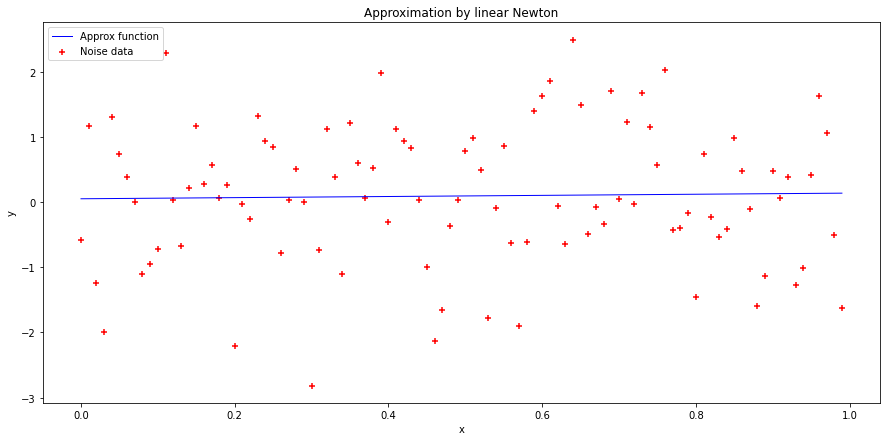

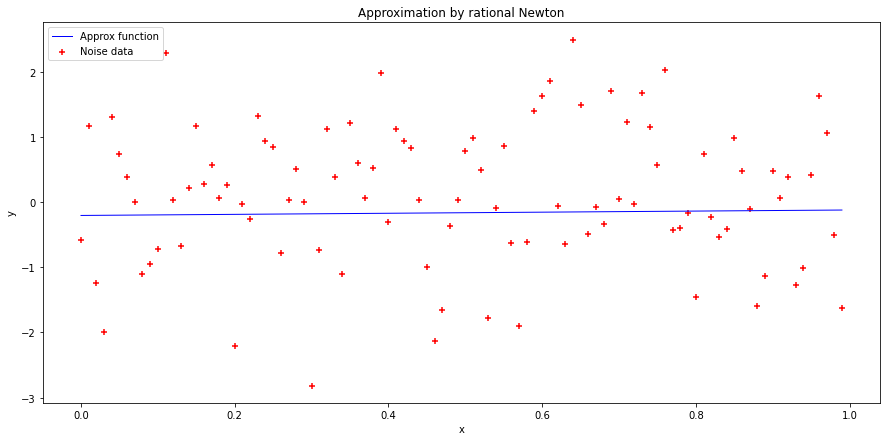

In [ ]:
get_plot("Approximation by linear Newton", 
         get_sample()[0], get_sample()[1], 
         linear_approximation(0.08679262, 0.0500572)[0], 
         linear_approximation(0.08679262, 0.0500572)[1])

get_plot("Approximation by rational Newton", 
         get_sample()[0], get_sample()[1], 
         linear_approximation(0.08383282, -0.20574289)[0], 
         linear_approximation(0.08383282, -0.20574289)[1])

# Levenberg-Marquardt

In [ ]:
from scipy.optimize import least_squares 
def f1_to_opt(a, b): 
  Dq = 0
  x = get_sample()[0]
  y = get_sample()[1]
  for k in range(n):
    Dq += ((a * x[k] + b) - y[k]) ** 2
  return Dq
n =100
x0 = (0,0)
lm1 = scipy.optimize.least_squares(f1_to_opt, x0, method='lm') 
#lm2 = scipy.optimize.least_squares(f2_to_opt,x0,method='lm')

In [4]:
x0=np.array([0,0]) 
n = 100
x = get_sample()[0]
y = get_sample()[1]

def f2_to_opt(z,*arg): 
  a, b =z 
  return [(a/(1+b*x[i])-y[i]) for i in range(0,n)]

from scipy.optimize import least_squares 

lm2= least_squares(f2_to_opt,x0,method='lm')
print(lm2)

 active_mask: array([0, 0])
        cost: 57.60882472176884
         fun: array([ 0.6689829 , -1.08114484,  1.32476817,  2.06846521, -1.22328226,
       -0.65418788, -0.29529867,  0.08301774,  1.18923699,  1.02770549,
        0.8049658 , -2.19649605,  0.05002499,  0.75976077, -0.13274493,
       -1.0812894 , -0.19435099, -0.4748518 ,  0.02859122, -0.17863172,
        2.29758535,  0.11548677,  0.35052666, -1.22484688, -0.85594409,
       -0.75209531,  0.86741559,  0.04980244, -0.42567502,  0.09276061,
        2.90198186,  0.82775171, -1.03023591, -0.2966562 ,  1.18669236,
       -1.11820632, -0.50118023,  0.02989607, -0.43824752, -1.88420666,
        0.39535513, -1.02767169, -0.84071885, -0.73658199,  0.06559251,
        1.08933398,  2.22380639,  1.75440033,  0.45936971,  0.06385404,
       -0.68809448, -0.88772293, -0.39089297,  1.87030521,  0.18733524,
       -0.76668204,  0.72750152,  2.00079894,  0.71260387, -1.30075121,
       -1.52620732, -1.75782592,  0.15133212,  0.73932028, -2.

In [ ]:
D2([0.08266527, -0.22815731])

115.21764944353778

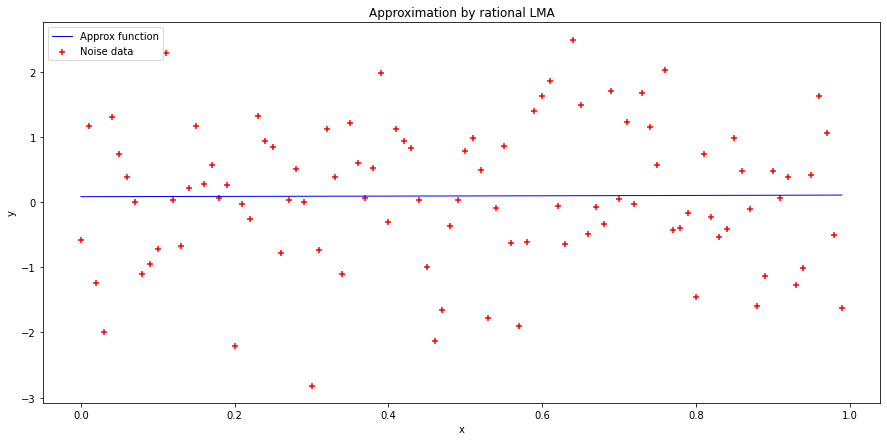

In [ ]:
get_plot("Approximation by rational LMA", 
         get_sample()[0], get_sample()[1], 
         rational_approximation(0.08266527, -0.22815731)[0], 
         rational_approximation(0.08266527, -0.22815731)[1])
  

In [ ]:
x0=np.array([0,0]) 
n = 100
x = get_sample()[0]
y = get_sample()[1]

def f1_to_opt(z,*arg): 
  a, b =z 
  return [(a*x[i] + b -y[i]) for i in range(0,n)]

from scipy.optimize import least_squares 

lm1= least_squares(f1_to_opt,x0,method='lm')
print(lm1)

 active_mask: array([0, 0])
        cost: 57.5863269094213
         fun: array([ 0.63637483, -1.11307402,  1.29351701,  2.0378912 , -1.25318   ,
       -0.68341023, -0.32384652,  0.05514348,  1.16203543,  1.00117571,
        0.77910689, -2.22168501,  0.02550504,  0.73590891, -0.15592966,
       -1.10380793, -0.21620429, -0.49604082,  0.00806551, -0.1984951 ,
        2.27838331,  0.09694509,  0.33264433, -1.24207085, -0.87251072,
       -0.76800561,  0.85216058,  0.03520169, -0.43962255,  0.07946526,
        2.88933762,  0.81575753, -1.04158112, -0.3073535 ,  1.17664186,
       -1.1276111 , -0.50994041,  0.02177939, -0.44572182, -1.89103972,
        0.38916218, -1.03322568, -0.84563504, -0.74086155,  0.06194842,
        1.08632418,  2.22142968,  1.75265551,  0.45825558,  0.06336937,
       -0.68795092, -0.88695236, -0.38949665,  1.87232602,  0.18997928,
       -0.76341605,  0.73138817,  2.00530495,  0.71772795, -1.29501039,
       -1.51985109, -1.75085561,  0.15891515,  0.74751468, -2.3

In [ ]:
D1([0.08679261, 0.0500572 ])

115.17265381884263

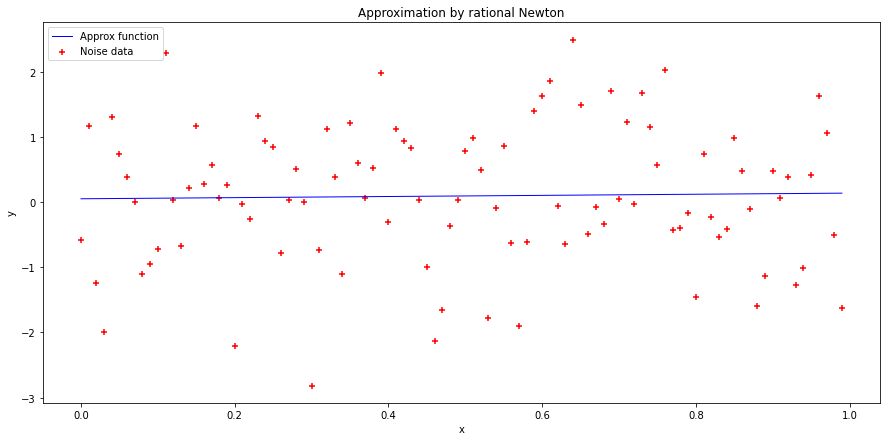

In [ ]:
get_plot("Approximation by linear LMA", 
         get_sample()[0], get_sample()[1], 
         linear_approximation(0.08679261, 0.0500572)[0], 
         linear_approximation(0.08679261, 0.0500572)[1])